In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy import io
from sklearn.mixture import GaussianMixture
import os
from mpl_toolkits import mplot3d

In [5]:
rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8, 6]

In [6]:
# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (0,0)
x = np.random.randn(n1+n2)
y = 0.5*np.random.randn(n1+n2)

# Random ellipse 2 centered at (1,-2)
x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

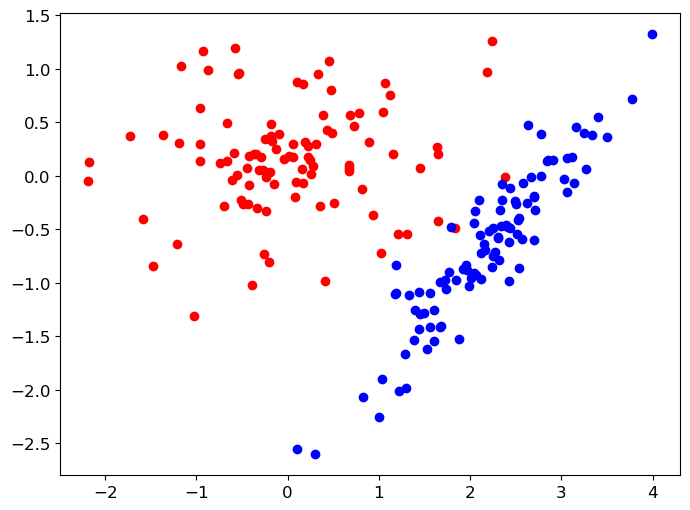

In [7]:
plt.figure()
plt.plot(x[:n1],y[:n1],'ro')
plt.plot(x3[:n1],y3[:n1],'bo')
plt.show()

In [8]:
# Training set: first 200 of 240 points
X1 = np.column_stack((x3[:n1],y3[:n1]))
X2 = np.column_stack((x[:n1],y[:n1]))

Y = np.concatenate((X1,X2))
Z = np.column_stack((np.ones(n1),2*np.ones(n1)))

# Test set: remaining 40 points
x1test = np.column_stack((x3[n1:],y3[n1:]))
x2test = np.column_stack((x[n1:],y[n1:]))


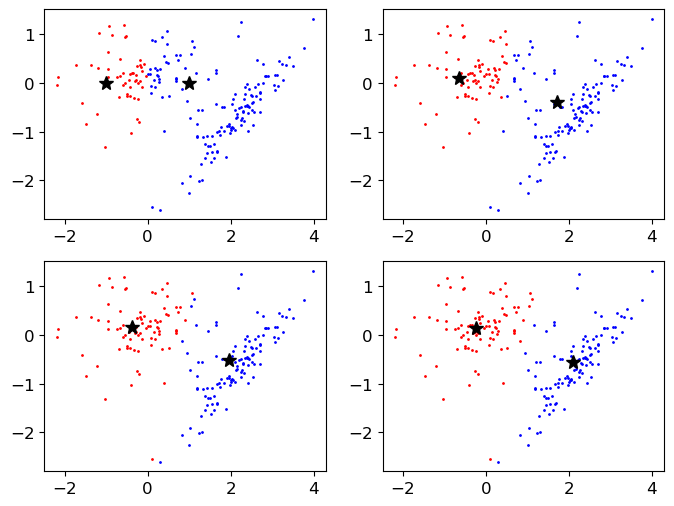

In [13]:
g1 = np.array([-1, 0]) # Initial guess
g2 = np.array([1, 0])
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    class1 = np.zeros((1,2))
    class2 = np.zeros((1,2))
    for jj in range(Y.shape[0]):
        d1 = np.linalg.norm(g1-Y[jj,:],ord=2)
        d2 = np.linalg.norm(g2-Y[jj,:],ord=2)
        if d1<d2:
            class1 = np.append(class1,Y[jj,:].reshape((1,2)),axis=0)
        else:
            class2 = np.append(class2,Y[jj,:].reshape((1,2)),axis=0)
    class1 = np.delete(class1, (0), axis=0) # remove zeros used to initialize
    class2 = np.delete(class2, (0), axis=0)
    
    axs[j].plot(class1[:,0],class1[:,1],'ro',ms=1)
    axs[j].plot(class2[:,0],class2[:,1],'bo',ms=1)
    axs[j].plot(g1[0],g1[1],'k*',ms=10)
    axs[j].plot(g2[0],g2[1],'k*',ms=10)
    
    g1 = np.array([np.mean(class1[:,0]),np.mean(class1[:,1])])
    g2 = np.array([np.mean(class2[:,0]),np.mean(class2[:,1])])
    
plt.show()

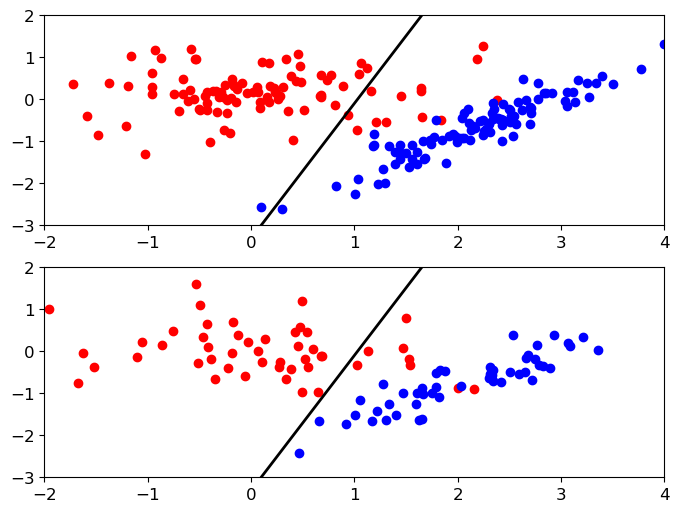

In [16]:
midx = (c[0,0]+c[1,0])/2
midy = (c[0,1]+c[1,1])/2
slope = (c[1,1]-c[0,1])/(c[1,0]-c[0,0]) # rise/run
b = midy+(1/slope)*midx
xsep = np.arange(-1,2,0.1)
ysep = -(1/slope)*xsep+b

fig,axs = plt.subplots(2)
axs[0].plot(x[:n1],y[:n1],'ro')
axs[0].plot(x3[:n1],y3[:n1],'bo')
axs[0].plot(xsep,ysep,c='k',linewidth=2)
axs[0].set_xlim(-2,4)
axs[0].set_ylim(-3,2)

# error on test data

axs[1].plot(x[n1:],y[n1:],'ro')
axs[1].plot(x3[n1:],y3[n1:],'bo')
axs[1].plot(xsep,ysep,c='k',linewidth=2)
axs[1].set_xlim(-2,4)
axs[1].set_ylim(-3,2)

plt.show()

## Gaussian Mixture Models

In [19]:
dogdata_w_mat = io.loadmat(os.path.join('Data','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('Data','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


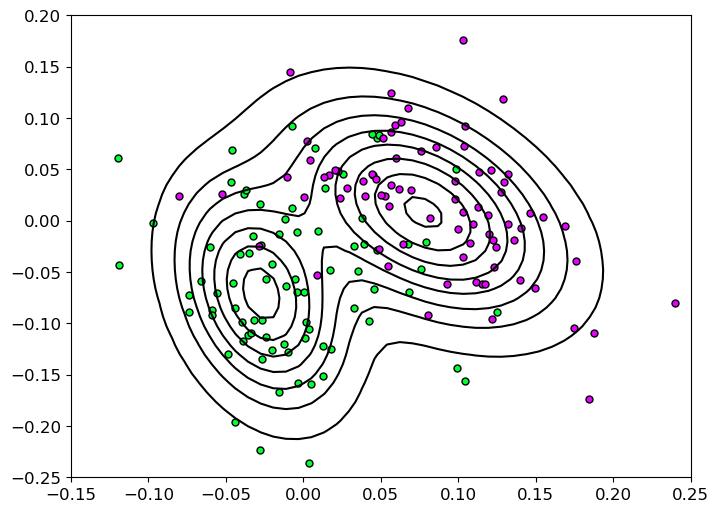

In [24]:
dogcat = v[:,(1,3)]
GMModel = GaussianMixture(n_components=2).fit(dogcat)
AIC = GMModel.aic(dogcat)

plt.plot(v[:80,1],v[:80,3],'ro',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=5)
plt.plot(v[80:,1],v[80:,3],'bo',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=5)

x = np.linspace(-0.15, 0.25)
y = np.linspace(-0.25, 0.2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z,levels=np.arange(3,32,4),colors='k',linestyles='solid')

plt.show()

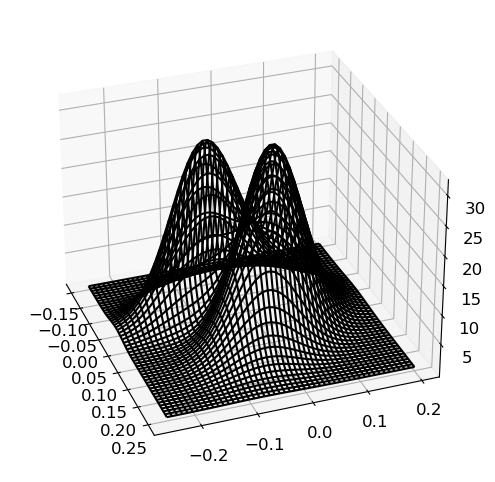

In [26]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.view_init(30, -20)
plt.show()

c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Guilherme\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memor

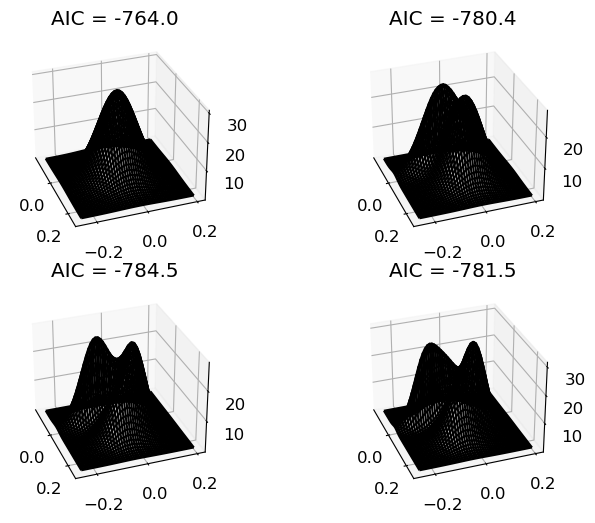

In [27]:
## AIC Scores
AIC = np.zeros(4)
GMModels = [GaussianMixture(k+1,covariance_type='diag',max_iter=500).fit(dogcat)
          for k in range(4)]

fig,axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)

for j in range(len(axs)):
    Z = np.exp(GMModels[j].score_samples(XX))
    Z = Z.reshape(X.shape)
    AIC[j] = GMModels[j].aic(dogcat)
    axs[j].plot_wireframe(X, Y, Z, color='black')
    axs[j].view_init(30, -20)
    axs[j].set_title('AIC = {:.4}'.format(AIC[j]))